In [1]:
import umap
import umap.plot
import pickle
import numpy as np
from dotenv import dotenv_values

config = dotenv_values(".env")

data_directory = config["DATA_DIR"]

print("Loading data...")
data = np.load(f'{data_directory}/data.npy')
print("Loaded data of shape {}".format(data.shape))

/Users/speleo/miniforge3/envs/umap-env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/speleo/miniforge3/envs/umap-env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/speleo/miniforge3/envs/umap-env/lib/python3.11/site-pac

Loading data...
Loaded data of shape (262144, 60)


/Users/speleo/miniforge3/envs/umap-env/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [62]:
print("Embedding into two dimensions using umap...")
embedding = umap.UMAP().fit(data)
print("Embedding complete.")

Embedding into two dimensions using umap...


KeyboardInterrupt: 

In [59]:
# The reshape here has to be modified depending on the step count and dthresh used
# For static initial conditions, just resize to (1, step_count)
# This only affects the color of the resulting scatterplot. We apply a color scheme
# based on the average rate of entropy change for that rule over the time it was
# simulated and averaged out.

average_diffs = np.array([np.diff(x.reshape((1, 60)), axis=1).mean() for x in data])

<Axes: >

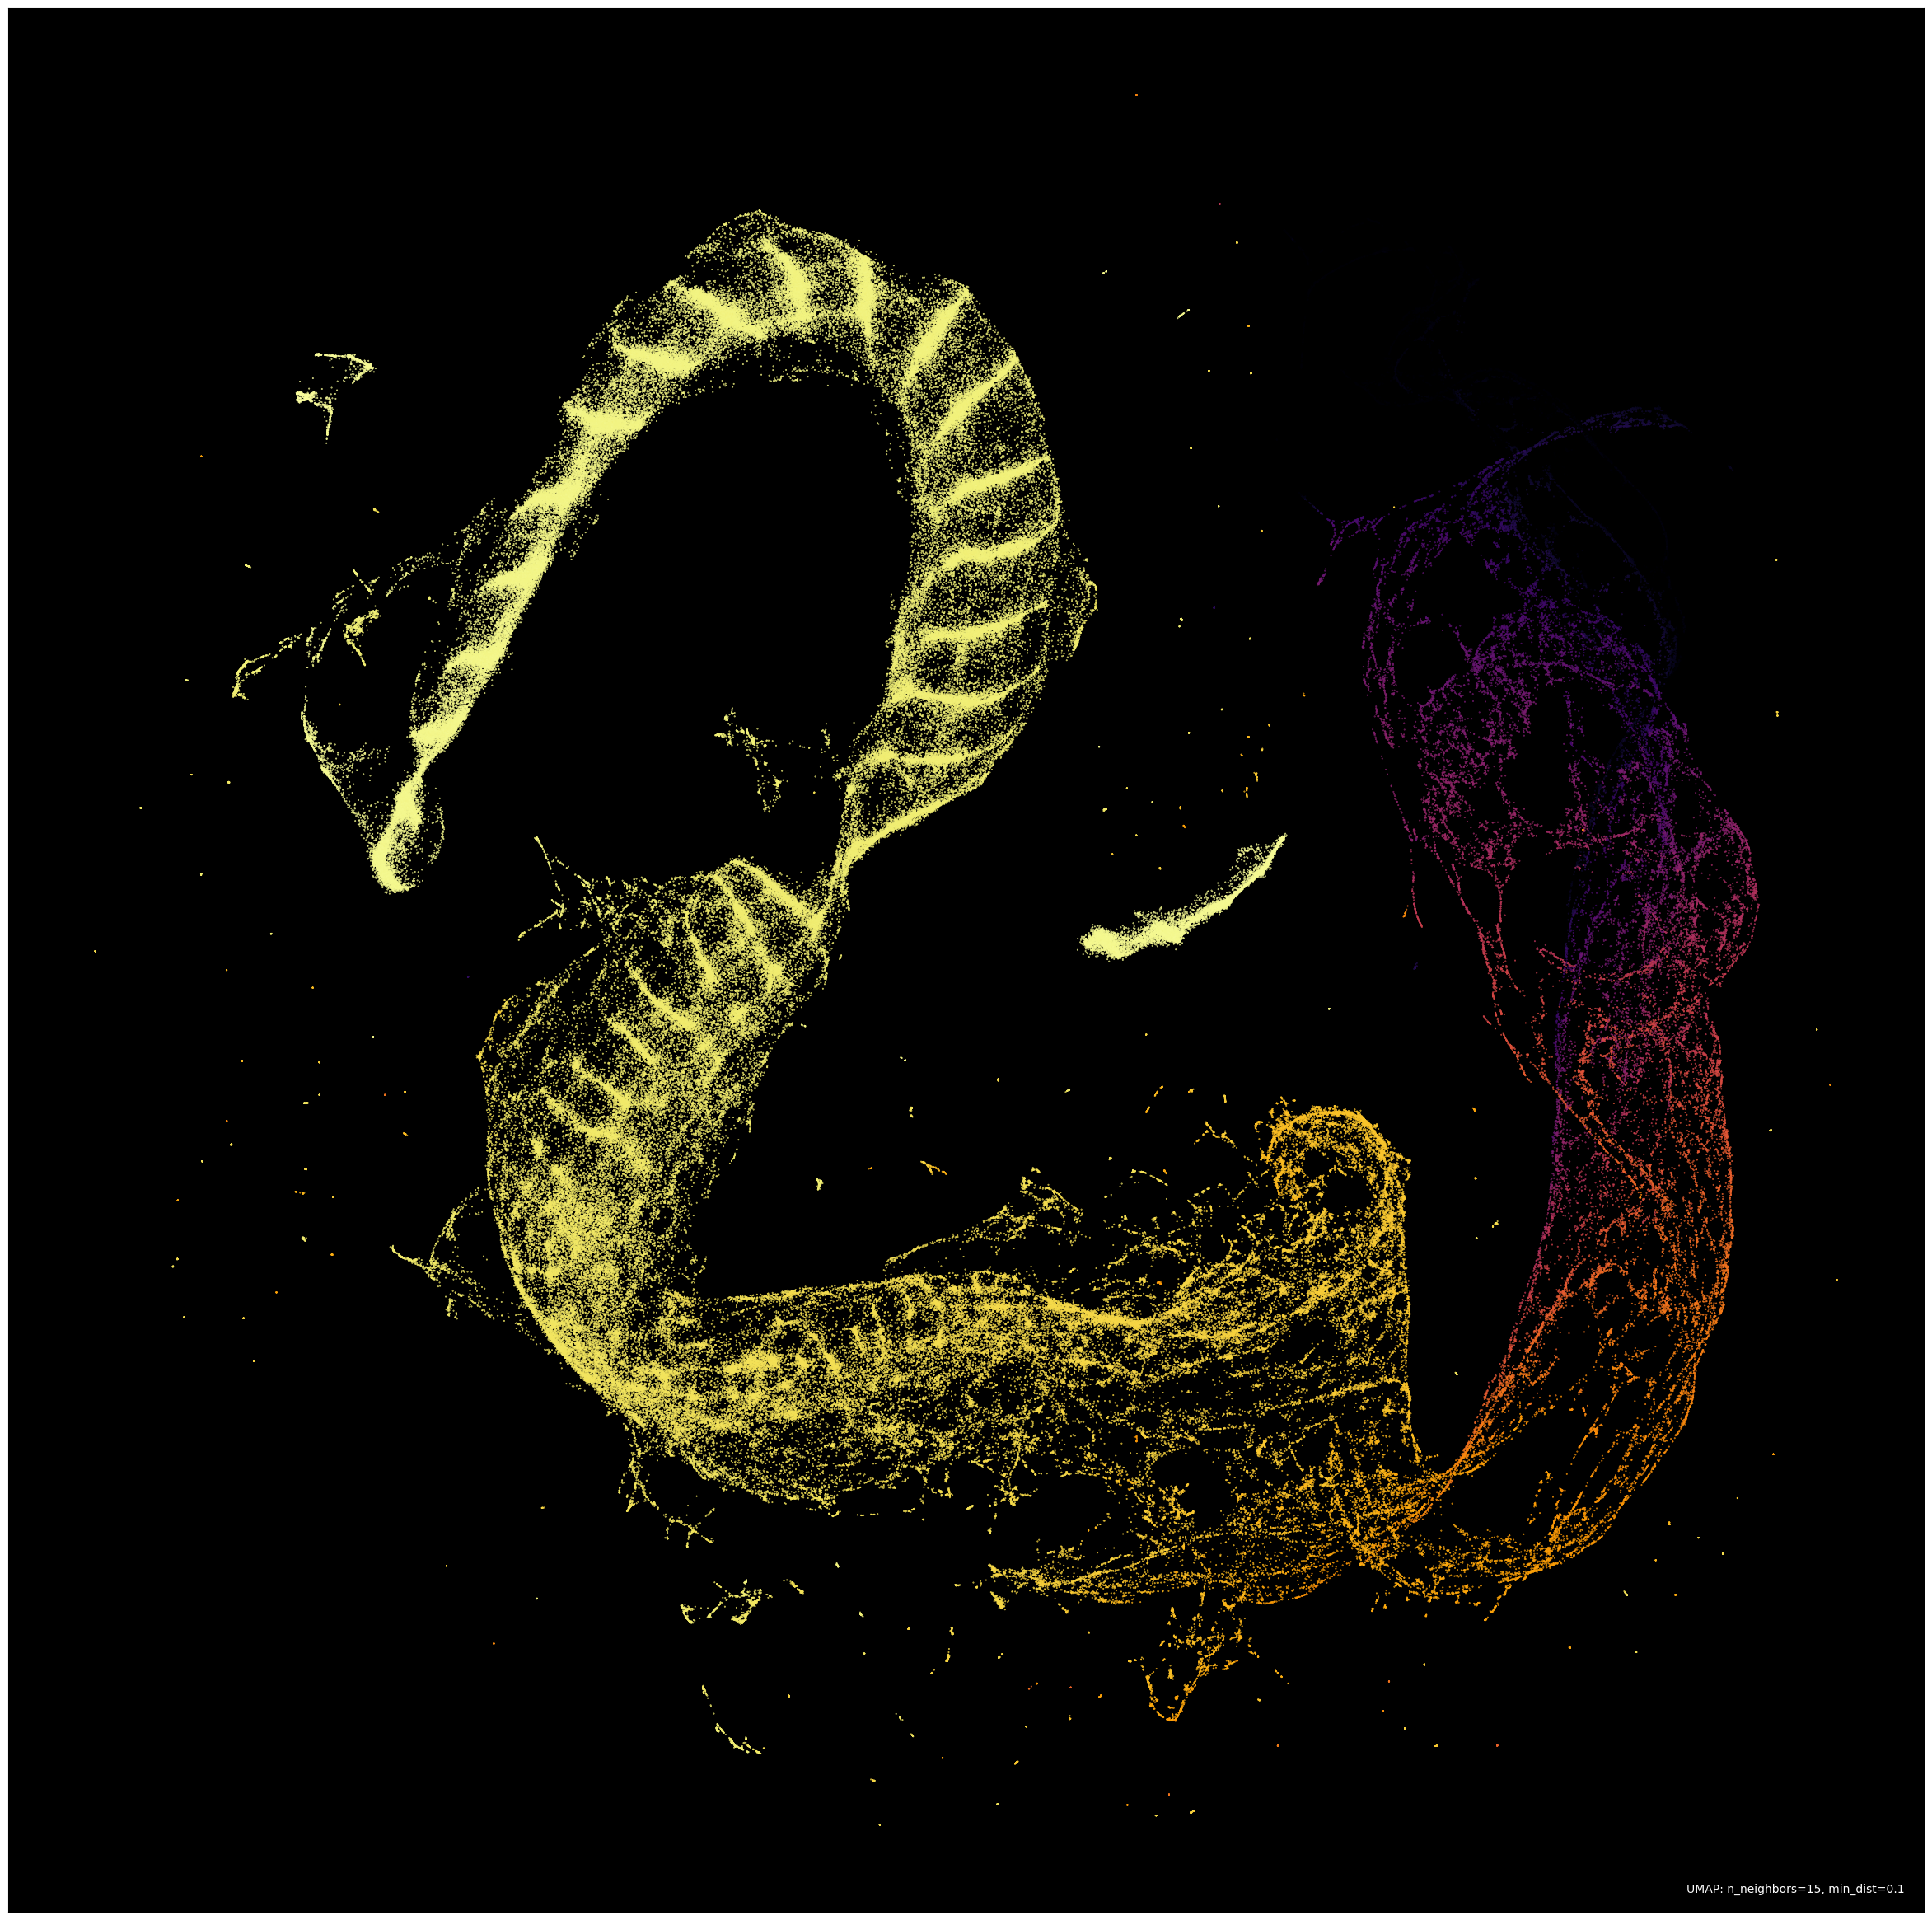

In [60]:
umap.plot.points(
     embedding,
     values=average_diffs,
     theme='inferno',
     width=3000,
     height=3000,
)

In [58]:
plt.savefig(f"{data_directory}/umap_plot.png")

<Figure size 640x480 with 0 Axes>

In [47]:
np.save(f"{data_directory}/embedding.npy", embedding.embedding_)
np.save(f"{data_directory}/average_diffs.npy", average_diffs)

In [29]:
import plotly.graph_objs as go

# Perform PCA on the dataset
pca = PCA(n_components=5)  # We calculate at least 3 components to make sure components_ is populated
pca.fit(data)

def show_component(n, name):
    # Get the first principal component
    first_pc = pca.components_[n]

    # Reshape this first principal component into the 5x60 2D structure
    first_pc_reshaped = first_pc.reshape((6, 50))

    # Prepare data for 3D surface plot using plotly
    x = np.arange(60)
    y = np.arange(5)
    X, Y = np.meshgrid(x, y)
    Z = first_pc_reshaped

    # Plotly 3D Surface plot
    fig = go.Figure(data=[go.Surface(z=Z)])
    fig.update_layout(
        title=name+' Principal Component',
        width=700,
        height=700,
        margin=dict(l=65, r=50, b=65, t=90)
    )
    fig.show()

In [30]:
show_component(0, 'First')

type: cannot reshape array of size 60 into shape (6,50)

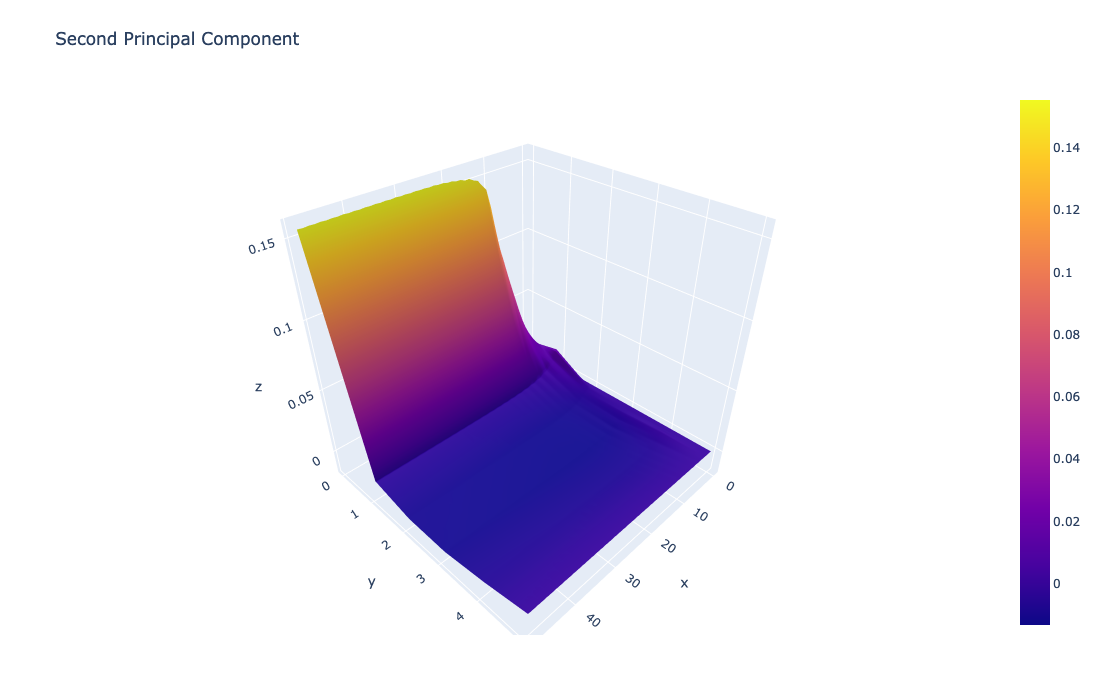

In [87]:
show_component(1, 'Second')

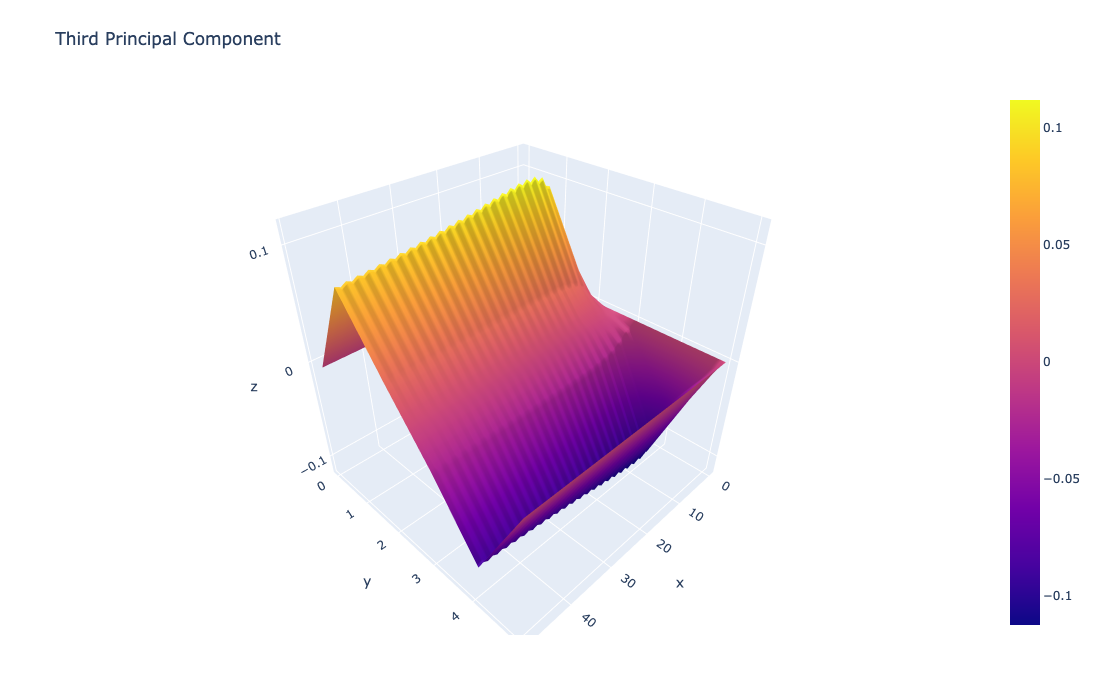

In [88]:
show_component(2, 'Third')

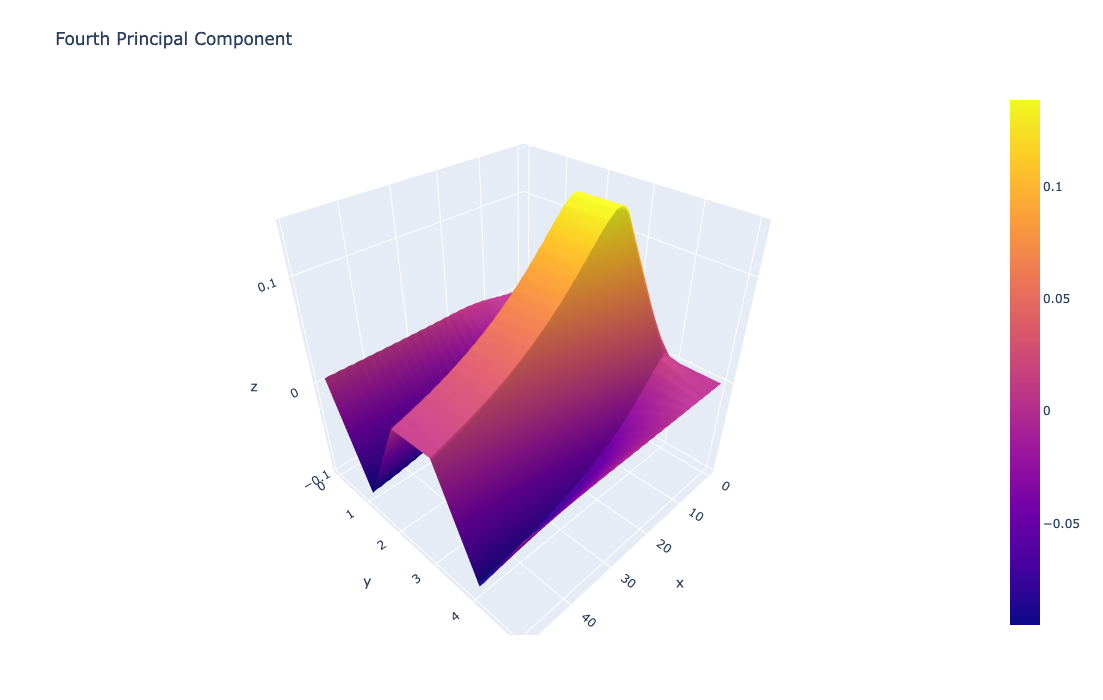

In [89]:
show_component(3, 'Fourth')

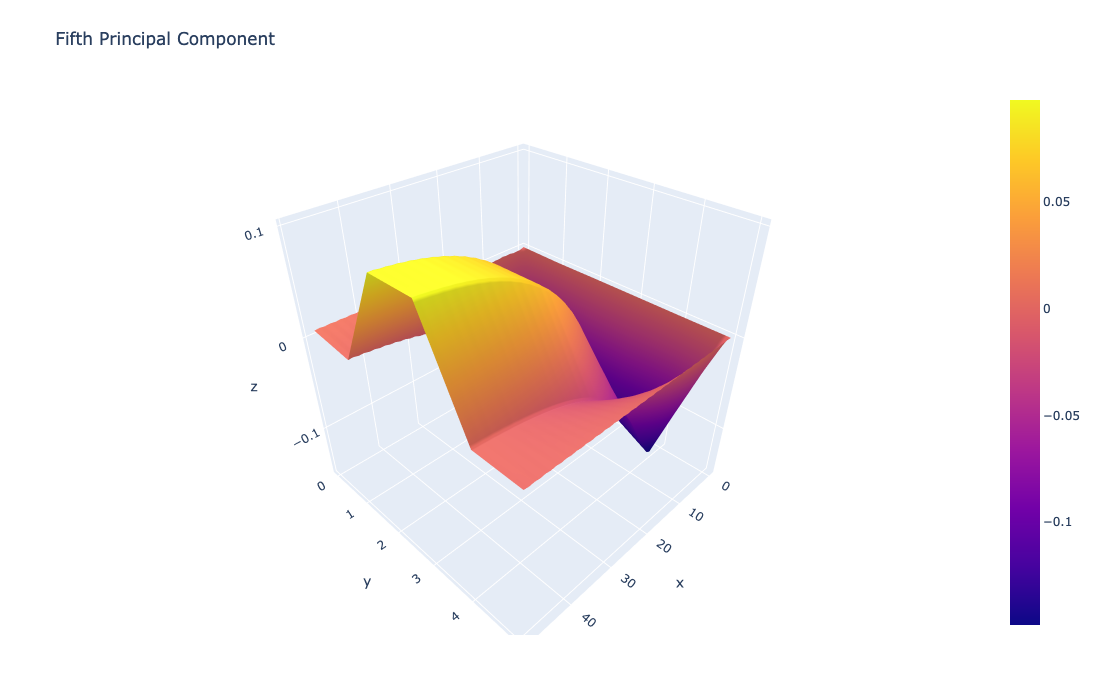

In [90]:
show_component(4, 'Fifth')